# Decision Tree: interpretability

## Algorithm

- Using the decision algorithm, we start at the tree root and split the data on the feature that results in teh largest Information Gain(IG). In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure or reach the limi for the maximal depth of the tree.

- Information Gain: the difference betweeen the impurity of the parent node and the sum of the child node impurities -- the lower the impurity of the childe nodes, the larger the information gain.

- Objective function: maximize the information gain at each split.

    $IG(D_p, f) = I(D_p) - \sum_{j=1}^m \frac{N_j}{N_p}I(D_j)$
    
    $IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left})- \frac{N_{right}}{N_p}I(D_{right})$
    


## Impurity Measures

- Entropy ($I_H$): 

    $I_H(t) = - \sum_{i=1}^cp(i|t)log_2p(i|t)$
    
    Note: $p(i|t)$ is the proportion of the samples that belong to class c for a particular node t. The entropy is therefore 0 if all samples at a note belong to the same classs and the entropy is maximal (equals to 1) 6if we have a uniform class distribution.

- Gini impurity ($I_G$): 
    
    $I_G(t) = \sum_{i=1}^c p(i|t)(1 - p(i|t)) = 1 - \sum_{i=1}^c p(i|t)^2$
    
    Note: a criteria to minimize the probability of misclassification. The Gini impurity is maximal (equals to 0.5) if the classes are perfecly mixied.
    
- Classification error ($I_E$):

    $I_E = 1 - max \{ p(i|t) \}$

    Note: this is useful for pruning but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes.

## Decision Tree in Sklearn

sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

Parameters:

- criterion: The function to measure the quality of a split: “gini”, “entropy”, default=”gini”.
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: The minimum number of samples required to split an internal node, default = 2.
- min_samples_leaf: The minimum number of samples required to be at a leaf node, default = 1.
- min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value,  default=0.0

Attributes:
- feature_importances: Return the feature importances.

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [4]:
# Plot the decision bounday
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


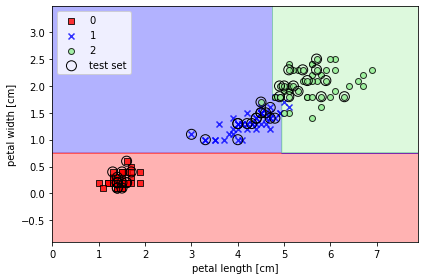

In [6]:
# Decision trees can build complex decision boundaries by dividing the feature space into rectangles.
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')


True

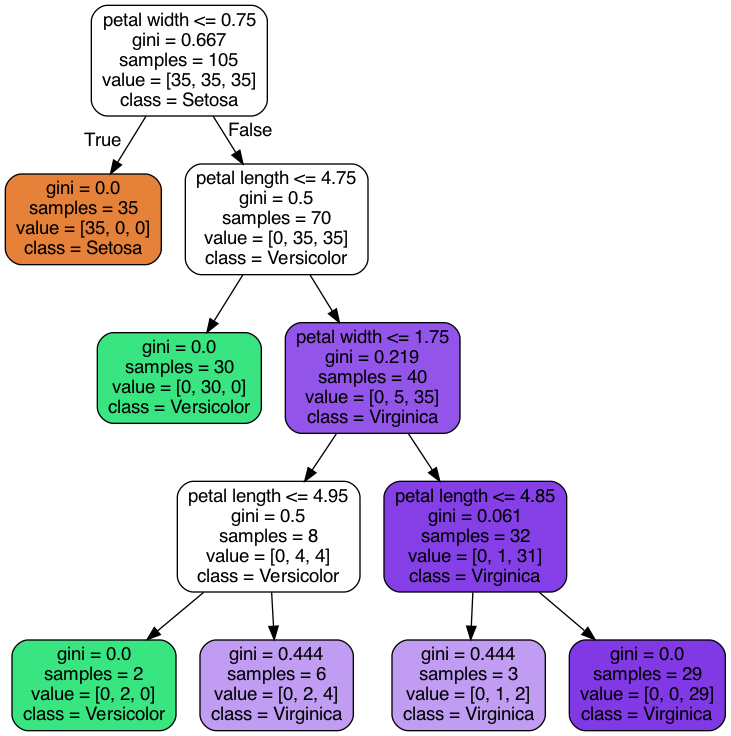

In [23]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Random Forest: an ensemble of decision trees

## Algorithm

The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance, to build a more robust model that has a better generalization performance and is less susceptible to overfitting.

    1. Draw a random bootstrap sample of size n
    2. Grow a decision tree from the bootstrap sample. At each node:
        a. Randomly select d features without replacement.
        b. Split the node using the feature that provides the best split according to the objective function (e.g. maximizing information gain)
    3. Repeat the steps 1-2 k times
    4. Aggregate the prediction by each tree to assign the class label by majority vote.
    
Not as interpretable as Decision Trees, but does not need to tune many hyperparameters. The only parameter that we really need to care about in practice is the number of trees k that we choose for the random forest.

## Random Forest in Sklearn

sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

Parameters:
- n_estimators: The number of trees in the forest, default=100
- criterion: The function to measure the quality of a split, {“gini”, “entropy”}, default=”gini”
- n_jobs: The number of jobs to run in parallel, default = None

Attributes:
- feature_importances_: The impurity-based feature importances.

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

/Users/jingnanbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


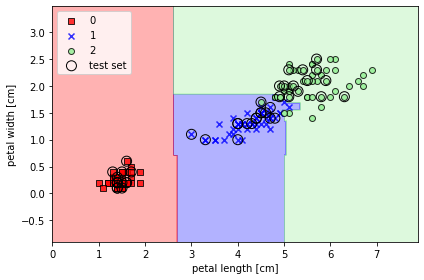

In [26]:
#plot the decision boundary
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

### Parameter selections:

- size of bootstrap sample: shrinking the size of the bootstrap samples may increase the randomness of the random forest, and it can help to reduce the effect of overfitting. However, it typically result in a lower overal performance of the randome forest. In scikit-learn, the size of the bootstrap sample is chosen to be equal to the number of sampels in the original training set, which usually provides a good bias-variance tradeoff.

- number of feature d at each split: default value in scikit-learn is $d=\sqrt{m}$